# Capstone Project - Anomaly Detection

## Table of contents
* [1.1	Data Source](#Data_Source)
* [1.2	Enterprise Data](#Enterprise_Data)
* [1.3	Streaming analytics](#Streaming_analytics)
* [1.4	Data Integration](#Data_Integration)
* [1.5	Data Repository](#Data_Repository)
* [1.6	Discovery and Exploration](#Discovery_and_Exploration)
* [1.7	Actionable Insights](#Actionable_Insights)
* [1.8	Applications / Data Products](Applications_Data_Products)
* [1.9	Security, Information Governance and Systems Management](#Security_Information_Governance_and_Systems_Management)

## 1.1	Data Source <a name="Data_Source"></a>

1.1.1	Technology Choice
The data source will be csv files, that contain information from environmental sensor data, each file contains the information of a single sensor. 

1.1.2	Justification
The proceed that will be apply for a sensor will be the same for the rest, and they are not related to each other so have the data in a single csv file facilitates the data manipulation.


## 1.2	Enterprise Data <a name="Enterprise_Data"></a>

1.2.1	Technology Choice
The data will be store in a main server property of the company that provide the sensors, and they will send the data via FTP. The data could be access by thirds with a user name and password. 

1.2.2	Justification
This solution simplifies the transfer of data from the sensors and have a control of the data. And can be easily access for other users that will have a profile and limit access to the data according the type of user. 


## 1.3	Streaming analytics <a name="Streaming_analytics"></a>

1.3.1	Technology Choice
The data from the sensor will arrive every 4 hours to the main service and the data will be process once arrive. This will allow to see first if all sensors are working and sending information (in order to make a quick intervention in case is necessary). And in order to make any semi real time intervention int the sewerage system.

1.3.2	Justification
The main objective is to obtain as many data as possible from the sewerage system, so say if a sensor is damage of broken in almost a real time is the main motivation. As second make some changes in the system management if it is necessary. 


## 1.4	Data Integration <a name="Data_Integration"></a>

1.4.1	Technology Choice
The data arrives already in a format that facilitates the use of the same, with a key of date-time. There is just a union of file and a sort of the data.

1.4.2	Justification
The format file is already studied in order to make the data integration and analysis as simple and immediately at possible. 

## 1.5	Data Repository <a name="Data_Repository"></a>

1.5.1	Technology Choice
We will keep all the packages that arrive from the sensors and a unique file of data integration. This is an object storage of a series of tables. 

1.5.2	Justification
This facilitates the data manipulation.

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt


Clean Data

In [2]:
fname='BRIANZA_000711A18_BA080.csv'
PUNTO=fname.split('_')[-1].replace('.csv','')
df = pd.read_csv(fname,sep=';',skiprows=[1,2],low_memory=False)
df = df[~df.DATAORA.duplicated(keep='last')]
df.dropna(axis=0, how='any', thresh=None, subset=['DATAORA'], inplace=True)
df.sort_values(by=['DATAORA'],inplace=True)

DEC_PRO=df.shape[1]-1
a=0

for i in range(DEC_PRO):
    A=df.iloc[:,i+1].dropna().astype(float).astype(str)
    A=A.str.split(".",expand=True)

    if A.shape[1]>1:
        a=a+1
        if len(A[1][A[1]!='0'])>0:
            a=a+1
            B=A[1][A[1]!='0'].str.len()
            A=int(B.mode()[0])

            df.iloc[:,i+1]=df.iloc[:,i+1].round(decimals=A)
            FF="{:."+str(A)+"f}"
            df.iloc[:,i+1]=df.iloc[:,i+1].map(FF.format)

df['DATAORA']=pd.to_datetime(df['DATAORA'],format='%Y-%m-%d %H:%M:%S')
df.head(5)

,DATAORA,TENSIONE BATTERIA,DOPPLER - PORTATA,DOPPLER - VELOCITA',DOPPLER - LIVELLO,DOPPLER - QUALITA',DOPPLER - TEMPERATURA
0,2019-03-08 16:36:00,13.34,40.997,0.341,0.341,85.0,13.4
1,2019-03-08 16:42:00,13.36,45.496,0.370,0.344,87.0,13.4
2,2019-03-08 16:48:00,13.36,43.356,0.350,0.345,90.0,13.4
3,2019-03-08 16:54:00,13.34,42.422,0.345,0.344,88.0,13.4
4,2019-03-08 17:00:00,13.36,46.111,0.375,0.344,87.0,13.4


## 1.6	Discovery and Exploration  <a name="Discovery_and_Exploration"></a>

1.6.1	Technology Choice
The data is basically the level, velocity, discharge and temperature of the water inside the sewerage system. As can be seen in the next picture

1.6.2	Justification
This will facilitate the control quality and signal stabilization. 

C:\Users\Sergioald\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


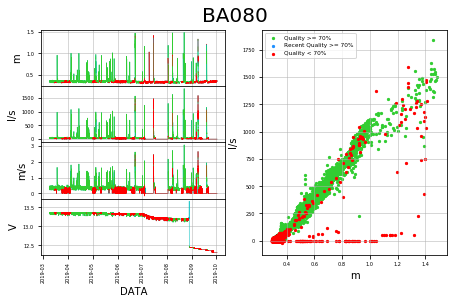

In [3]:
df.columns = df.columns.str.replace('DOPPLER - ', '')
df.columns = df.columns.str.replace("'", '')
df.columns = df.columns.str.replace(' ', '_')

df.TENSIONE_BATTERIA=df.TENSIONE_BATTERIA.astype(float)
df.PORTATA=df.PORTATA.astype(float)
df.VELOCITA=df.VELOCITA.astype(float)
df.LIVELLO=df.LIVELLO.astype(float)
df.QUALITA=df.QUALITA.astype(float)

A=datetime.datetime.now() - datetime.timedelta(days=1.5)

df3=df.where(df.QUALITA < 70)
df4=df.where(df.QUALITA >= 70)
df5=df4.where(df4.DATAORA >= A)

fig, axs = plt.subplots(ncols=2, nrows=4,sharex=True)
axs[0,0].plot(df.DATAORA,df.LIVELLO,'c-',linewidth=0.5)
axs[0,0].plot(df4.DATAORA,df4.LIVELLO, color='limegreen', linestyle='-',linewidth=0.5)
axs[0,0].plot(df5.DATAORA,df5.LIVELLO, color='dodgerblue', linestyle='-',linewidth=0.5)
axs[0,0].plot(df3.DATAORA,df3.LIVELLO, color='red', linestyle='-',linewidth=0.5)
axs[0,0].set_ylabel('m',fontsize=10)
axs[0,0].tick_params(labelsize =5)
axs[0,0].yaxis.grid(True,linewidth=0.5)
axs[0,0].xaxis.grid(True,linewidth=0.5)

axs[1,0].plot(df.DATAORA,df.PORTATA,'c-',linewidth=0.5)
axs[1,0].plot(df4.DATAORA,df4.PORTATA, color='limegreen', linestyle='-',linewidth=0.5)
axs[1,0].plot(df5.DATAORA,df5.PORTATA, color='dodgerblue', linestyle='-',linewidth=0.5)
axs[1,0].plot(df3.DATAORA,df3.PORTATA, color='red', linestyle='-',linewidth=0.5)
axs[1,0].set_ylabel('l/s',fontsize=10)
axs[1,0].tick_params(labelsize =5)
axs[1,0].yaxis.grid(True,linewidth=0.5)
axs[1,0].xaxis.grid(True,linewidth=0.5)

axs[2,0].plot(df.DATAORA,df.VELOCITA,'c-',linewidth=0.5)
axs[2,0].plot(df4.DATAORA,df4.VELOCITA, color='limegreen', linestyle='-',linewidth=0.5)
axs[2,0].plot(df5.DATAORA,df5.VELOCITA, color='dodgerblue', linestyle='-',linewidth=0.5)
axs[2,0].plot(df3.DATAORA,df3.VELOCITA, color='red', linestyle='-',linewidth=0.5)
axs[2,0].set_ylabel('m/s',fontsize=10)
axs[2,0].tick_params(labelsize =5)
axs[2,0].yaxis.grid(True,linewidth=0.5)
axs[2,0].xaxis.grid(True,linewidth=0.5)

axs[3,0].plot(df.DATAORA,df.TENSIONE_BATTERIA,'c-',linewidth=0.5)
axs[3,0].plot(df4.DATAORA,df4.TENSIONE_BATTERIA, color='limegreen', linestyle='-',linewidth=0.5)
axs[3,0].plot(df5.DATAORA,df5.TENSIONE_BATTERIA, color='dodgerblue', linestyle='-',linewidth=0.5)
axs[3,0].plot(df3.DATAORA,df3.TENSIONE_BATTERIA, color='red', linestyle='-',linewidth=0.5)
axs[3,0].set_ylabel('V',fontsize=10)
axs[3,0].tick_params(labelsize =5)
axs[3,0].set_xlabel('DATA',fontsize=10)
axs[3,0].yaxis.grid(True,linewidth=0.5)
axs[3,0].xaxis.grid(True,linewidth=0.5)

plt.setp(axs[3,0].xaxis.get_majorticklabels(), rotation=90,fontsize=5)

gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:, -1]:
  ax.remove()
fig.add_subplot(gs[0:, -1])
plt.scatter(df4.LIVELLO, df4.PORTATA, c='limegreen', s=5, label="Quality >= 70%")
plt.scatter(df5.LIVELLO, df5.PORTATA, c='dodgerblue', s=5, label="Recent Quality >= 70%")
plt.scatter(df3.LIVELLO, df3.PORTATA, c='r', s=5, label="Quality < 70%")
plt.tick_params(labelsize =5)
plt.grid(True,linewidth=0.5)
plt.xlabel("m",fontsize=10)
plt.ylabel("l/s",fontsize=10)     
plt.legend(loc='upper left',fontsize = 'xx-small')
fig.suptitle(PUNTO,fontsize=20)
plt.subplots_adjust(top=0.9,bottom=0.119,left=0.051,right=0.99,hspace=0,wspace=0.2)

## 1.7	Actionable Insights <a name="Actionable_Insights"></a>


1.7.1	Technology Choice
There will be the implementation of anomaly detection with a Long Short Term (LSTM) neuronal network for the time series analysis. For this we will use an autoencoder like in Applied AI with Deep Learning.

1.7.2	Justification
We are interested in the detection of anomalies so the using of LSTM seams to satisfy this demand.


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import  Dense
from keras.layers import LSTM
from keras.callbacks import Callback
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
#Select fields and load data
#fields=["PORTATA","VELOCITA","LIVELLO","TEMPERATURA"]
fields=["TEMPERATURA","VELOCITA","LIVELLO"]
#fields=["VELOCITA","LIVELLO"]
data_healthy_or=df[fields]
data_healthy_or.head(5)

,TEMPERATURA,VELOCITA,LIVELLO
0,13.4,0.341,0.341
1,13.4,0.370,0.344
2,13.4,0.350,0.345
3,13.4,0.345,0.344
4,13.4,0.375,0.344


In [6]:
timesteps = 40
dim = data_healthy_or.shape[1]
nn=1500
nn=nn-(nn % timesteps)

In [7]:
def handleLoss(loss):
        global losses
        losses+=[loss]
        print(loss)
        
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

In [8]:
lossHistory = LossHistory()
losses = []
#Desing network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))

model.add(Dense(dim))
model.compile(loss='mae', optimizer ='adam')

In [9]:
def train(data):
      model.fit(data, data, epochs = 50, batch_size=64, validation_data=(data,data), verbose=0, shuffle=False, callbacks=[LossHistory()] )

def score(data):
      yhat=model.predict(data,verbose=1)
      return yhat

def create_trimmed_recording(df):
      samples=len(df)
      print(samples)
      trim= samples % timesteps
      print(trim)
      print(samples-trim)
      df_trim=df[:samples-trim]
      samples=len(df_trim)
      print(timesteps)
      print(samples/timesteps)
      df_trim.shape=(int(samples/timesteps), timesteps, dim)
      return df_trim

def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

In [10]:
for i in range(round(len(data_healthy_or)/nn)+1):
      aa=i*nn
      bb=(i+1)*nn
      if len(data_healthy_or)-aa>10:
            data_healthy=data_healthy_or[aa:bb]
            data_healthy=data_healthy.values
            
            data_healthy_trim=   create_trimmed_recording(data_healthy)  
            
            train(data_healthy_trim) 

1480
0
1480
40
37.0

4.569473
4.503116
4.4465966
4.381359
4.3207684
4.260096
4.2022367
4.1520476
4.1059675
4.0848055
4.0834517
4.0750027
4.0603924
4.041937
4.0223117
4.0032716
3.9847298
3.9657524
3.945451
3.923895
3.9011672
3.8773646
3.8526585
3.827346
3.801899
3.779308
3.7627673
3.7451143
3.725096
3.7019522
3.6765602
3.650254
3.623713
3.6004002
3.5776496
3.5537124
3.5287156
3.502696
3.476059
3.448455
3.420901
3.3934455
3.3672204
3.3416424
3.3150375
3.2873998
3.2596092
3.2319937
3.2047865
3.1775625
1480
0
1480
40
37.0
3.2004204
3.1732726
3.1455574
3.117687
3.0899856
3.062599
3.0357692
3.0089028
2.982133
2.9554331
2.9287946
2.9022534
2.875846
2.8495588
2.8233135
2.7969925
2.7705536
2.7440903
2.717759
2.6914673
2.6650236
2.6383677
2.6118445
2.5852137
2.5585086
2.5317416
2.5046122
2.477532
2.4501104
2.4226038
2.3946662
2.366419
2.3380156
2.309188
2.2802186
2.2506037
2.2206864
2.1901546
2.1591592
2.1278162
2.095734
2.063108
2.030089
1.9967982
1.9635621
1.9304838
1.897616
1.865362
1.8334968

0.18214345
0.18094051
0.18229698
0.18027684
0.18364464
0.18161769
0.1850106
0.18422587
0.18324813
0.18366235
0.18297571
0.18265282
0.18227296
0.18080686
0.18313307
0.18131681
0.18176001
0.18040949
0.18090938
1480
0
1480
40
37.0
0.3617755
0.3533262
0.34726235
0.3282058
0.32692546
0.30648407
0.2959027
0.28697783
0.26462835
0.2542215
0.24509984
0.22798301
0.22926442
0.22407307
0.23055933
0.2302607
0.23192227
0.23438026
0.2330016
0.23463134
0.23549598
0.23318556
0.23429702
0.23198213
0.2317563
0.2284946
0.22761917
0.22381303
0.22395325
0.22261666
0.21901546
0.22175442
0.2155436
0.22079743
0.21694763
0.21859482
0.2161365
0.21934053
0.2199555
0.2155074
0.21985996
0.21434364
0.21809053
0.21316615
0.2164347
0.21132758
0.21409817
0.21045382
0.21477208
0.2104713
1480
0
1480
40
37.0
0.25798804
0.24861619
0.23708923
0.23238705
0.21879384
0.20172705
0.1957587
0.1803334
0.17487669
0.1669678
0.16620748
0.1660488
0.16914159
0.17262073
0.17501031
0.17788456
0.17835096
0.17883441
0.17766382
0.17548981
0

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
129
9
120
40
3.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


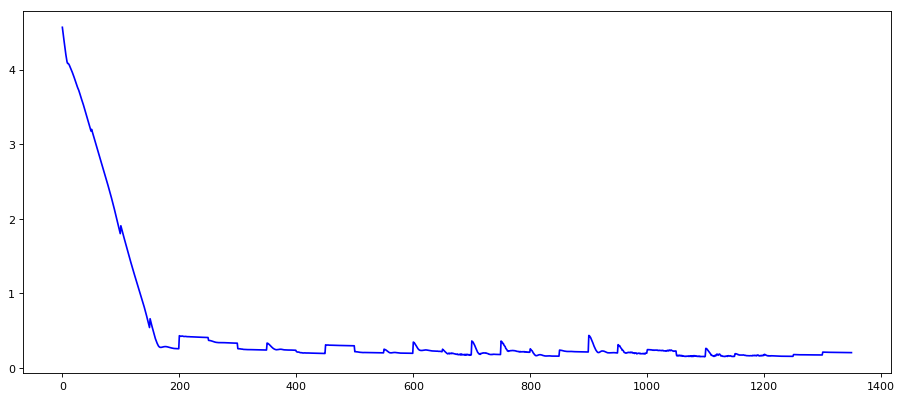

In [11]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,len(losses)), losses, '-', color='blue')#, animated = True, linewidth=1)

In [12]:
lossHistory = LossHistory()
losses = []

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))

model.add(Dense(dim))
model.compile(loss='mae', optimizer ='adam')

In [13]:
for i in range(round(len(data_healthy_or)/nn)+1):
      
      aa=i*nn
      bb=(i+1)*nn
      if len(data_healthy_or)-aa>10:
            data_healthy=data_healthy_or[aa:bb]
            data_healthy=data_healthy.values
            data_healthy_scaled = scaleData(data_healthy)
            data_healthy_trim=   create_trimmed_recording(data_healthy_scaled)  
            
            train(data_healthy_trim) 

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


1480
0
1480
40
37.0
0.46827012
0.43961078
0.4065644
0.37187755
0.33745518
0.3045099
0.27462643
0.25093833
0.23585483
0.22417086
0.20989838
0.19191214
0.17076795
0.15044646
0.13707459
0.13163751
0.13072373
0.1324264
0.13611849
0.13879563
0.13882297
0.13616918
0.13135289
0.12541187
0.119302645
0.11377232
0.10924243
0.10600638
0.10447903
0.10475295
0.105879605
0.10670535
0.10639486
0.104734845
0.10196299
0.098749734
0.09575684
0.093528435
0.09220415
0.09141352
0.09070911
0.08981385
0.08868932
0.08742955
0.08611532
0.08487055
0.08355946
0.082120486
0.08056812
0.07910139
1480
0
1480
40
37.0
0.13277313
0.12473722
0.113507636
0.107943915
0.10718165

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.10272798
0.09337863
0.080110654
0.065248884
0.05265936
0.05527084
0.06454753
0.06777174
0.06744314
0.067756526
0.06524798
0.059404187
0.052202668
0.046061866
0.04626938
0.049857516
0.051791053
0.051807888
0.051083963
0.04884205
0.044902965
0.041563302
0.041684728
0.043923
0.04465752
0.04426688
0.0431124
0.040769603
0.03915294
0.03956459
0.040446006
0.040777385
0.040547676
0.039537307
0.038248
0.037653394
0.037896838
0.03814009
0.038205974
0.03784191
0.037003346
0.03641209
0.036413234
0.036550377
0.036544316
1480
0
1480
40
37.0
0.12250559
0.11780043
0.11022382
0.10223101
0.096074216
0.093790784
0.095365815
0.09814026
0.099343225

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.098194204
0.09489051
0.090344004
0.086225234
0.08352784
0.08237895
0.082307234
0.08232541
0.081544735
0.079632714
0.07687622
0.07394477
0.071691
0.070616394
0.07035087
0.06989408
0.0685005
0.066421226
0.064415924
0.06311883
0.06263256
0.06240203
0.061895836
0.06096637
0.059824787
0.05900486
0.058788102
0.05884319
0.058636177
0.058045343
0.05743141
0.05698975
0.05676392
0.05657921
0.056280393
0.05574052
0.055119622
0.054740366
0.054528903
0.05425617
0.05391454
1480
0
1480
40
37.0
0.090147234
0.08825777

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.085215665
0.08271347
0.08156646
0.08127529
0.08126857
0.08106511
0.080214396
0.078752965
0.07695615
0.0752246
0.07373728
0.07252916
0.071487576
0.070436984
0.06945764
0.06850961
0.06758609
0.066590324
0.0655429
0.06455782
0.06375549
0.06314054
0.062699914
0.06228047
0.061729502
0.06101442
0.06022508
0.05952933
0.05897369
0.05848565
0.05798607
0.057422504
0.056802846
0.056219235
0.055695932
0.05528457
0.055033874
0.054781515
0.05447308
0.054140132
0.053825967
0.053524658
0.05327231
0.053020205
0.05273224
0.0524159
0.052076202
0.051738657
1480
0
1480
40
37.0
0.06191765
0.055921666
0.0482456
0.041971765
0.03912838

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.041987423
0.04442958
0.044059794
0.042892344
0.040597953
0.03550698
0.033123933
0.03675127
0.038517788
0.03728026
0.03535568
0.03341402
0.032876886
0.032906387
0.033340126
0.03371975
0.032148127
0.030169657
0.030494235
0.031692933
0.031510156
0.030179348
0.029425982
0.029693583
0.030078124
0.02982965
0.029256802
0.028759392
0.028856015
0.029148359
0.028982142
0.028391931
0.028043445
0.02818421
0.028252777
0.027932389
0.027653458
0.027638309
0.027632223
0.027561532
0.027335588
0.027128873
0.027135689
0.027123867
0.026937691
1480
0
1480
40
37.0
0.0310472
0.028746303
0.029440539
0.030444277
0.02970753
0.028247967
0.028658094
0.028694026

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.028211344
0.028035756
0.027564967
0.027434021
0.027691996
0.027319022
0.026654284
0.026750209
0.026832787
0.026308673
0.026106654
0.026273983
0.026080951
0.025674537
0.025773954
0.025537532
0.025421191
0.02534427
0.025181368
0.025004642
0.025084598
0.02479431
0.02474101
0.024684107
0.024545107
0.024407212
0.024367131
0.024212178
0.024161952
0.024011673
0.023964914
0.023854416
0.023743084
0.023665689
0.023616603
0.023470629
0.023441248
0.02332999
0.023267625
0.023187215
0.02310679
0.023047587
1480
0
1480
40
37.0
0.03615093
0.03387655


C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0.031235794
0.0307217
0.032105613
0.03304506
0.032512948
0.030876165
0.0295563
0.029654596
0.030432707
0.030629382
0.029939832
0.02907342
0.028777076
0.029041909
0.029241944
0.02904657
0.028628865
0.028342031
0.028236179
0.02824189
0.028223831
0.028107218
0.027898539
0.027710425
0.027629746
0.027655078
0.027665634
0.027551176
0.027363986
0.027253475
0.027260883
0.027280472
0.027196782
0.027043147
0.026937218
0.026911102
0.026894104
0.02682039
0.026712386
0.026628831
0.0265806
0.026539529
0.02647983
0.02640669
0.026342615
0.02628649
0.026235621
0.026187882
1480
0
1480
40
37.0
0.028011858
0.02659574
0.025544832
0.025512494

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.025751093
0.025690742
0.025075793
0.024162106
0.023982603
0.023892945
0.023786556
0.023984889
0.023984574
0.023492813
0.02332508
0.023542022
0.023586575
0.02326639
0.022991644
0.022922128
0.02279379
0.022709733
0.022682378
0.022525216
0.022320881
0.022325078
0.022379505
0.022289772
0.022200812
0.02214329
0.02206521
0.022025727
0.021994878
0.021880854
0.021802627
0.021809733
0.02177311
0.021713108
0.021676647
0.021636607
0.021600144
0.02157039
0.021506086
0.021449454
0.021428907
0.02139134
0.021343514
0.021307493
0.021268025
0.021246161
1480
0
1480
40
37.0
0.034219634
0.031537723
0.029805847
0.030547574
0.03137767
0.031420752
0.030465072
0.029081665

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.028761575
0.029532477
0.029722488
0.028619241
0.027803218
0.028016958
0.028371708
0.028147053
0.027529763
0.027213307
0.027430702
0.027593674
0.0273423
0.026915602
0.026811384
0.026982369
0.026914261
0.026580589
0.026400862
0.026430696
0.026403872
0.0262284
0.026020855
0.02594103
0.025943339
0.025864903
0.025708627
0.025597325
0.025579546
0.025546739
0.025415573
0.02530698
0.025271678
0.025226701
0.025130654
0.025038593
0.024973415
0.024922416
0.024855461
0.024768015
0.024700062
0.024656659
1480
0
1480
40
37.0
0.022800347
0.021855952
0.021024672
0.021427156
0.021760304
0.020630414

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.020221047
0.020424305
0.020326084
0.01960935
0.019331029
0.01966245
0.019436022
0.01910944
0.019253805
0.019409433
0.019077256
0.018961472
0.018992115
0.01885068
0.01854972
0.018517697
0.018548414
0.018367501
0.018349156
0.018407272
0.018315693
0.018227216
0.018270038
0.018167695
0.018095016
0.01804928
0.018009856
0.017920798
0.017897729
0.017891843
0.017821118
0.017814513
0.017787436
0.017729444
0.017703842
0.01767168
0.01762019
0.017602
0.017572178
0.017531393
0.017515084
0.017479202
0.017454103
0.01742314
1480
0
1480
40
37.0
0.01490194
0.014804812
0.014815058
0.014714662

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.014703173
0.014649874
0.014534198
0.014553167
0.014466956
0.01438668
0.014391513
0.014314087
0.014281753
0.014285221
0.014255678
0.014206537
0.014214802
0.0141984755
0.014127739
0.014144702
0.014139138
0.014050412
0.01405674
0.014061961
0.01398592
0.013950792
0.013955922
0.013904466
0.013856934
0.013847764
0.013813302
0.013775091
0.013757787
0.013724989
0.013696898
0.01366954
0.013646778
0.013623026
0.013601873
0.013581796
0.013559713
0.013533012
0.013506435
0.013483511
0.013459494
0.013437956
0.0134168845
0.013395537
0.0133739095
0.013351925
1480
0
1480
40
37.0
0.017001282
0.016627248
0.01672263
0.01687812
0.01664181
0.016492477
0.016644577
0.016560715

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.016355768
0.016474463
0.016442707
0.016281787
0.01632403
0.016321896
0.016189598
0.016200114
0.016178561
0.016112851
0.01609717
0.016072825
0.016027834
0.01598072
0.015982918
0.01592684
0.015899858
0.01589648
0.015839487
0.01582375
0.015804345
0.015763687
0.015745629
0.01572438
0.015689274
0.015668347
0.015648054
0.015614245
0.015598372
0.015572332
0.015544197
0.015526284
0.015498776
0.015474557
0.015455584
0.01542982
0.015405584
0.015387035
0.015359939
0.015339334
0.015317575
0.015293013
1480
0
1480
40
37.0
0.014874986
0.014672867
0.014648183

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.014731977
0.0146873295
0.014542248
0.014474379
0.014506952
0.01447683
0.014357886
0.014322788
0.014335968
0.01429634
0.01421156
0.014177869
0.014189592
0.014116986
0.014069529
0.014074697
0.014032998
0.013979256
0.013982302
0.013949595
0.013908092
0.013903253
0.013866813
0.0138521055
0.013834061
0.013801809
0.013790426
0.013761546
0.013739768
0.013725025
0.013692281
0.013676651
0.013654268
0.013628877
0.013610695
0.013586547
0.013567136
0.01354316
0.013523813
0.013505341
0.013480369
0.013464339
0.013443071
0.013423711
0.013404712
0.01338577
0.013368264
1480
0
1480
40
37.0
0.03492777
0.03418534
0.033993345
0.033861224
0.033331193

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.033077143
0.03271756
0.032231383
0.032332078
0.032219023
0.031957656
0.03190863
0.03178238
0.031741932
0.031695966
0.03140081
0.031333577
0.031267706
0.03103868
0.030903904
0.030693209
0.030602312
0.030463971
0.030236995
0.030186431
0.030062003
0.029946085
0.029840536
0.029726148
0.029669052
0.029535186
0.029411102
0.029329365
0.029191459
0.029078804
0.028968878
0.028873663
0.028777499
0.02867069
0.028604116
0.028504511
0.02841144
0.028325446
0.028235087
0.028145205
0.02804339
0.0279664
0.02787111
0.02778878
0.027701069
1480
0
1480
40
37.0
0.0440756

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.043655217
0.04344318
0.04320965
0.042897865
0.042516805
0.042328876
0.042080875
0.04176607
0.041438367
0.041195437
0.040882416
0.040567752
0.040306047
0.04008067
0.03984517
0.03956378
0.039350025
0.03911323
0.038841907
0.038617525
0.0383971
0.038167275
0.03793653
0.037737906
0.03751373
0.037286457
0.037085027
0.036867574
0.036647983
0.036449805
0.03624204
0.036032077
0.035832368
0.035629462
0.03542251
0.035227098
0.0350337
0.03483676
0.03464472
0.03445985
0.034267128
0.034079287
0.033895116
0.03370151
0.033521265
0.033333726
0.033152312
0.032972597
0.032798957
1480
0
1480
40
37.0
0.012051623
0.011212676
0.011268515
0.011339695
0.011049747
0.01058002
0.010819334

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.010773817
0.010243176
0.010454734
0.010466527
0.009956886
0.010074556
0.010119945
0.009731137
0.009756857
0.009834606
0.0095486
0.009629782
0.009720867
0.009407699
0.009514371
0.009536482
0.009258426
0.009396759
0.009406325
0.009154651
0.009303807
0.009261777
0.009098012
0.00918308
0.009103828
0.009023728
0.00906221
0.008946799
0.008962123
0.008916975
0.008868519
0.008872243
0.008814202
0.008802172
0.008768806
0.008730508
0.008719221
0.008671854
0.008673705
0.008631716
0.00862811
0.008602746
0.008575101
1480
0
1480
40
37.0
0.010442961
0.0104018515
0.010384317
0.010346284

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.010324072
0.01029353
0.010276497
0.01024942
0.010235032
0.010207707
0.010189326
0.010162895
0.01014372
0.010118399
0.01009934
0.010074548
0.010056909
0.010033761
0.010017525
0.009994772
0.009976852
0.009955924
0.009935992
0.0099167805
0.009897369
0.009878549
0.009860895
0.00984328
0.009826537
0.009808862
0.009791962
0.009774811
0.009757707
0.009741888
0.009725578
0.0097104255
0.009694853
0.009679107
0.009664411
0.0096492255
0.009634498
0.009620555
0.00960569
0.009591639
0.009577563
0.009563731
0.009550023
0.009536328
0.00952324
0.009509922
1480
0
1480
40
37.0
0.01080391
0.011153241
0.010454302
0.0109877195
0.010506721
0.010905326
0.010631411
0.010192378
0.010505686

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.010395781
0.009598886
0.010381928
0.010338901
0.010085486
0.010022133
0.010888017
0.010150642
0.01153409
0.0114863515
0.01043301
0.010546164
0.010505841
0.009267687
0.010823757
0.009226664
0.011574212
0.01090227
0.009433215
0.009759023
0.009871512
0.009329732
0.010429175
0.0097269295
0.011309972
0.011406768
0.009513329
0.011521487
0.012067247
0.009100236
0.012133155
0.013261139
0.011895756
0.00873647
0.0119025335
0.012595019
0.011022584
0.009408295
0.010952936
0.00958428
0.010288907
1480
0
1480
40
37.0
0.008827108
0.007959246
0.008261346
0.008676939
0.007887024

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.008071742
0.0085175205
0.007818616
0.007837085
0.0081900265
0.0075036576
0.00793904
0.008158181
0.007459661
0.007970398
0.008093496
0.007374218
0.007952467
0.007984596
0.0073145223
0.007845859
0.007722588
0.0073170997
0.007614601
0.007280942
0.007515406
0.0074491715
0.007290682
0.007398909
0.007179242
0.0073296437
0.007138811
0.007270762
0.0071063363
0.0072450666
0.0070749153
0.0071961884
0.0070606945
0.007161295
0.0070380857
0.0071190456
0.007016057
0.007099207
0.006992009
0.0070489547
0.00697216
0.0070006447
0.006967096
0.0069549116
0.0069606286
1480
0
1480
40
37.0
0.006790741

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.006877273
0.006934222
0.0067583355
0.006683217
0.0066915276
0.0067588203
0.006867467
0.0067114327
0.0066371504
0.006611177
0.0065904153
0.0065910146
0.0065841926
0.006663548
0.0067420974
0.0067537413
0.0065378165
0.0065371203
0.006720813
0.0066744764
0.006588055
0.006524095
0.0065557198
0.0066027627
0.0066528064
0.0065139183
0.0064882045
0.0065052575
0.0066076824
0.0065572863
0.006533345
0.0064656683
0.006482431
0.006510879
0.0065881573
0.00646437
0.0064436477
0.006423048
0.0064893914
0.006482435
0.006459834
0.006386421
0.0064078756
0.0064499634
0.0064968807
0.006366013
0.006347945
0.006372327
0.0064820433
1480
0
1480
40
37.0
0.010670138
0.010314578
0.009792686
0.01112134
0.010061206
0.0109099625
0.010837438
0.010163732

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.010242106
0.009942938
0.00979599
0.010868367
0.010074575
0.010780858
0.011840571
0.009417013
0.010803376
0.010004329
0.010969518
0.012036424
0.009337988
0.011430958
0.010825116
0.010253276
0.012406078
0.010056995
0.0126503315
0.013507668
0.010637972
0.011853752
0.014400072
0.01268118
0.011682121
0.0132762715
0.011504976
0.012067204
0.010913644
0.011164315
0.011562899
0.010735006
0.010317294
0.011599662
0.011579076
0.011344429
0.009926546
0.01143015
0.010167432
0.010915713
0.01207679
0.011682541
1480
0
1480
40
37.0
0.022813275
0.022358052
0.020697132

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.020476094
0.020881042
0.020556645
0.019607693
0.020277746
0.020229928
0.019349841
0.019531585
0.019692034
0.019267172
0.018980626
0.019283777
0.018906819
0.018544558
0.018692987
0.018449433
0.01815318
0.018176198
0.018076066
0.017818522
0.017780028
0.01774618
0.017544383
0.017373804
0.01742426
0.017176617
0.017160648
0.01712941
0.016987102
0.016919496
0.01686375
0.01676052
0.016658727
0.01662151
0.0165211
0.016435504
0.016367313
0.016286379
0.016184747
0.016112505
0.016049078
0.015967522
0.015918015
0.015843607
0.015772026
0.01572178
0.01565286
1480
0
1480
40
37.0
0.013788852
0.013715139
0.013670795

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.013564809
0.013492789
0.013472625
0.013547155
0.014028448
0.013843567
0.013329068
0.013188068
0.013236415
0.013386236
0.01337946
0.013210556
0.012943862
0.01296975
0.012838105
0.012866595
0.012899042
0.012888898
0.012629442
0.012565338
0.012389523
0.012503106
0.012572944
0.012553564
0.012152481
0.012030552
0.01205769
0.012386185
0.012249484
0.012127078
0.01190344
0.012002504
0.011965514
0.011998451
0.011849863
0.011901077
0.011746827
0.011748095
0.011630311
0.011749079
0.01160259
0.011604333
0.011457064
0.0114518525
0.011394493
0.011525531
0.011315382
1480
0
1480
40
37.0
0.006859823
0.006052215
0.006210255
0.006652731
0.0060754293

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.0059688813
0.006228648
0.005706449
0.0059420727
0.006120428
0.005651718
0.0059241676
0.0061676167
0.005666899
0.0059783724
0.0063023563
0.005796793
0.0059628165
0.006393176
0.006134639
0.005452665
0.005844836
0.005657734
0.0056918557
0.0057978192
0.0055082655
0.005768388
0.005825065
0.0054051494
0.0057209786
0.0058277645
0.0053992486
0.005721779
0.005961725
0.005545475
0.0056919265
0.0059865327
0.005650659
0.0054260613
0.0057925982
0.005556381
0.0054134848
0.005609104
0.005309595
0.0055458876
0.005720616
0.0053353296
0.005551039
0.0058287783
0.00547995
1480
0
1480
40
37.0
0.007763195
0.008081295
0.008098871

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.007551815
0.007824841
0.0080516
0.0075985743
0.007632004
0.007873842
0.007598519
0.007525231
0.007625325
0.00760718
0.0073928763
0.007442071
0.0075209076
0.0073166974
0.007327478
0.0073626726
0.007252527
0.0072415457
0.007288243
0.007173283
0.007198366
0.0071888757
0.0071229497
0.0071422746
0.0071186647
0.0070675556
0.007098927
0.007039624
0.0070402957
0.0070267213
0.006994058
0.006995292
0.0069738557
0.0069515603
0.006951305
0.0069241924
0.00691662
0.00690475
0.006883067
0.006878702
0.006857605
0.006847534
0.006835467
0.006818494
0.006810763
0.0067929756
0.006786033
1480
0
1480
40
37.0
0.0055999607
0.005592148
0.0055649295
0.0055671744
0.00554022
0.0055288794
0.0055110054
0.005504737
0.005483464

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.005474415
0.0054594777
0.0054505314
0.005430471
0.005424288
0.005407008
0.005395306
0.0053811166
0.0053706644
0.005356333
0.0053457585
0.0053325016
0.0053216587
0.0053081755
0.0052976636
0.0052849823
0.0052725216
0.0052622827
0.0052491836
0.0052381726
0.0052267625
0.005215875
0.0052042147
0.005193374
0.0051822932
0.005170701
0.0051596793
0.0051487572
0.0051380396
0.0051272283
0.005117203
0.005107054
0.005096065
0.0050855656
0.0050754584
0.005065355
0.0050549204
0.005044722
0.005034816
0.005025028
0.0050148363
1480
0
1480
40
37.0
0.0057321517
0.0057101194
0.0056860414

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0.005654147
0.005623472
0.0056033367
0.005589749
0.0055782693
0.005579077
0.0055546826
0.0055622817
0.0055302884
0.005520695
0.005513661
0.005489445
0.0054849642
0.0054768426
0.0054615634
0.005457868
0.0054426678
0.0054302495
0.0054237875
0.0054099304
0.0054051415
0.005398775
0.00538802
0.0053855404
0.005374687
0.005364639
0.0053596525
0.005347922
0.005340658
0.005334575
0.0053242994
0.0053180205
0.0053110346
0.00530258
0.005296542
0.0052889194
0.005281309
0.0052751573
0.0052677663
0.0052615674
0.005255734
0.005248178
0.0052420087
0.005235705
0.005228319
0.0052221357
0.0052166195
1480
0
1480
40
37.0
nan
nan
nan
nan
nan
nan

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1480

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



0
1480
40
37.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1480
0
1480
40
37.0
nan
nan

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1480
0
1480
40
37.0
nan
nan
nan
nan
nan

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1480
0
1480
40
37.0
nan

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1480
0
1480
40
37.0
nan
nan
nan

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
129
9
120
40
3.0
nan
nan
nan
nan
nan
nan
nan

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


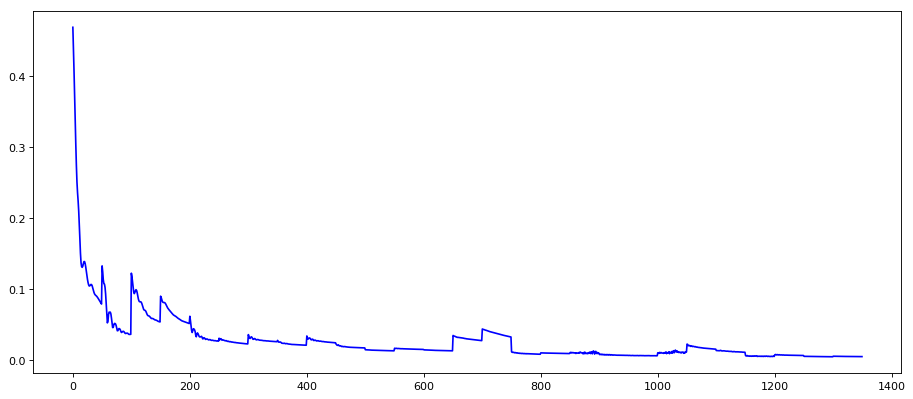

In [14]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,len(losses)), losses, '-', color='blue')#, animated = True, linewidth=1)

In [15]:
lossHistory = LossHistory()
losses = []

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))

model.add(Dense(dim))
model.compile(loss='mae', optimizer ='adam')

In [16]:
data_healthy_scaled_or = scaleData(data_healthy_or.to_numpy())

C:\Users\Sergioald\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
data_healthy_scaled_or= pd.DataFrame(data=data_healthy_scaled_or)

In [18]:
for i in range(round(len(data_healthy_or)/nn)+1):
      
      aa=i*nn
      bb=(i+1)*nn
      if len(data_healthy_scaled_or)-aa>10:
            data_healthy_scaled=data_healthy_scaled_or[aa:bb]
            data_healthy_scaled=data_healthy_scaled.values
            data_healthy_trim=   create_trimmed_recording(data_healthy_scaled)  
            train(data_healthy_trim) 

1480
0
1480
40
37.0
0.14761268
0.13394828
0.123938896
0.11543828
0.10600289
0.09581145
0.08503341
0.0738234
0.062416255
0.05119063
0.046877865
0.044351093
0.04053056
0.0367601
0.035620686
0.036104698
0.03537832
0.033267964
0.030193772
0.027983624
0.029306773
0.029666182
0.028779166
0.02729693
0.025358558
0.023142222
0.021071184
0.020213535
0.021090629
0.022297535
0.022895869
0.022770068
0.021986859
0.020717809
0.019248271
0.018225126
0.018097218
0.018504608
0.018795475
0.018726505
0.018326895
0.017788885
0.017452262
0.017357558
0.017261513
0.01701668
0.016670315
0.016348898
0.01619203
0.016196417
1480
0
1480
40
37.0
0.025249617
0.025053285
0.024467427
0.023722718
0.023146728
0.023019165
0.023130922
0.023175584
0.023024013
0.022655003
0.022156183
0.02169382
0.021469671
0.021420125
0.021347474
0.021130312
0.020770682
0.020375518
0.020085288
0.019921448
0.019816348
0.019657262
0.019407032
0.019118963
0.018881952
0.018712925
0.018580593
0.018423509
0.018222407
0.017997408
0.01779257
0.0176

0.009067239
0.008880671
0.008100724
0.009414461
0.00787827
0.00864019
0.008161575
0.007893686
0.008373962
0.007861348
0.0077949865
0.008291843
0.0076781153
0.007714349
0.008109842
0.0076924367
0.0075373584
0.007809104
0.007823888
0.007432073
0.0074513075
0.0077100536
0.007501269
0.0073512765
0.007357439
0.0075363675
0.0073595317
0.007225242
0.007202196
0.007243274
0.0073100915
0.007397742
0.0072368924
0.0071281716
0.007115049
0.0071851457
0.007318702
0.007138554
0.007044752
0.007035256
0.0070914556
0.0071277353
0.007053285
0.007010241
0.0069726105
0.007004387
0.0070332377
1480
0
1480
40
37.0
0.008141145
0.0082109645
0.008656458
0.008013695
0.008023111
0.008620231
0.007884666
0.008438934
0.008198519
0.007759692
0.008302842
0.007879549
0.0077187708
0.007927205
0.008086778
0.0077140885
0.007989629
0.008076476
0.0076752896
0.008213368
0.007742219
0.007560681
0.007703951
0.0078792665
0.0073345494
0.0074616484
0.007881205
0.0072540645
0.0074823573
0.007915167
0.0073317774
0.007693559
0.00757

0.003944714
0.004014862
0.0044433684
0.0036527626
0.0042669415
0.0047631096
0.004024399
1480
0
1480
40
37.0
0.006114179
0.0064610685
0.005707966
0.0060021044
0.006425905
0.005995221
0.0054095704
0.0058549424
0.0053720563
0.0056799734
0.005866753
0.0052550156
0.005759278
0.005769565
0.005183631
0.0055981986
0.0053461334
0.0054575913
0.0055114194
0.005104431
0.0052700876
0.0050924136
0.005283461
0.005046082
0.0050649615
0.0051060063
0.005034468
0.0050521432
0.0049705934
0.0049418416
0.0050033797
0.005011856
0.004946396
0.004892682
0.004899632
0.0049148817
0.0049072257
0.00493253
0.004930975
0.0048732115
0.0048421193
0.004838765
0.004832885
0.0048164567
0.0047994563
0.0047957185
0.0048181703
0.004848332
0.004845369
0.0048654545
1480
0
1480
40
37.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1480
0
1480
40
37.0
nan
nan
nan
nan
nan
nan
n

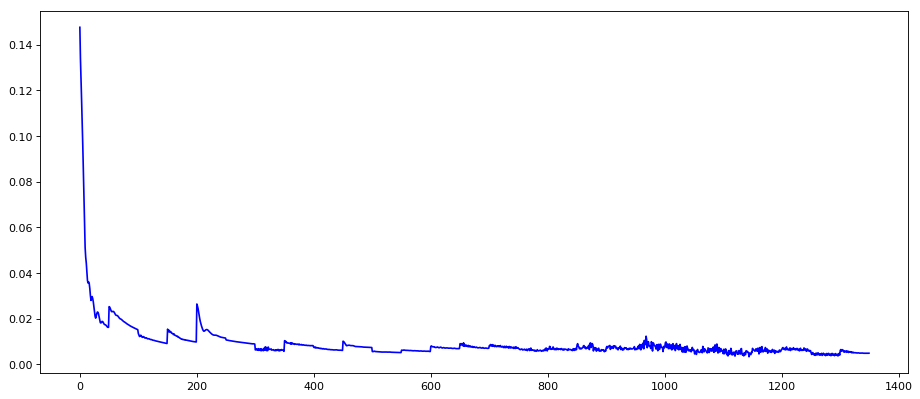

In [19]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,len(losses)), losses, '-', color='blue')#, animated = True, linewidth=1)

## 1.8	Applications / Data Products <a name="Applications_Data_Products"></a>

1.8.1	Technology Choice
The main data product will be an automatic report that can be send via e-mail if any of the sensors have problems.

1.8.2	Justification
The objective is to register the biggest amount of data as possible with a good quality so know in a semi real time if something is going wrong with a sensor is fundamental. 

## 1.9	Security, Information Governance and Systems Management <a name="Security_Information_Governance_and_Systems_Management"></a>

1.9.1	Technology Choice
The data will be store in a private server. To this server just the selected people from the company will have access. The code will be also store in this server and just the developers will have access to the same. To visualize the data or obtain the union of the files the users will be allow to access via internet (with a user and a password) to a specific area of the service and will be able to download the data and visualize it. 
1.9.2	Justification
This will allow to have control of the data, and be sure how access to it. Also the user will not be allow to modify the data or the code. 